# Nonlinear parameter calculation

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.ticker import  MaxNLocator
from topdc_calc import topdc_calc

#### Data import

In [2]:
mode_data=np.load('mode_data.npy',allow_pickle=True).item()

In [3]:
## Dispersion data
dispdata=np.load('disp_data.npy',allow_pickle=True).item()
omf=dispdata['omf']
triplet_neff=dispdata['triplet_neff']
omp=dispdata['omp']
pump_neff=dispdata['pump_neff']
wp_cutoff=9.8  #Pump mode cutoff frequency in 10^14 rad/s

disp_data=topdc_calc(omf,triplet_neff,omp,pump_neff,wp_cutoff)

#### Mode profiles

In [4]:
x_p=mode_data['x_p']
y_p=mode_data['y_p']

E_xp=mode_data['E_xp']
E_yp=mode_data['E_yp']

In [5]:
x_f=mode_data['x_f']
y_f=mode_data['y_f']

E_xf=mode_data['E_xf']
E_yf=mode_data['E_yf']

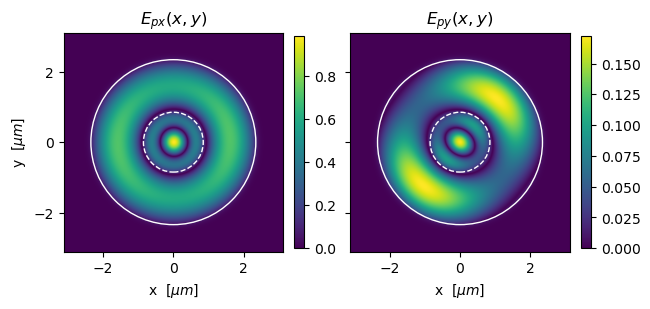

In [6]:
fig1, axs1 = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)

c1=axs1[0].imshow(np.abs(E_xp),extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
c2=axs1[1].imshow(np.abs(E_yp),extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
# c3=axs1[2].imshow(np.abs(E_zp),extent=[x_p[0]*1e6,x_p[1]*1e6,y_p[0]*1e6,y_p[0]*1e6])

axs1[0].set_ylabel(r'y  [$\mu m$]')

axs1[0].set_title(r'$E_{px}(x,y)$')
axs1[1].set_title(r'$E_{py}(x,y)$')
# axs1[2].set_title(r'$E_{pz}(x,y)$')

for ax in axs1.flat:
    circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
    circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    # Automatically set ticks using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.set_xlabel(r'x  [$\mu m$]')

fig1.colorbar(c1,ax=axs1[0],shrink=0.45)
fig1.colorbar(c2,ax=axs1[1],shrink=0.45)
# fig1.colorbar(c3,ax=axs1[2],shrink=0.3)

fig1.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

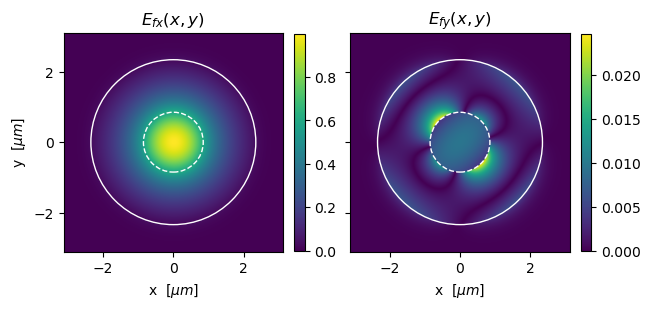

In [7]:
fig2, axs2 = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)
c21=axs2[0].imshow(np.abs(E_xf),extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])
c22=axs2[1].imshow(np.abs(E_yf),extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])
# c3=axs1[2].imshow(np.abs(E_zf),extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])

axs2[0].set_ylabel(r'y  [$\mu m$]')

fig2.colorbar(c21,ax=axs2[0],shrink=0.46)
fig2.colorbar(c22,ax=axs2[1],shrink=0.46)
# fig1.colorbar(c3,ax=axs1[2],shrink=0.3)

axs2[0].set_title(r'$E_{fx}(x,y)$')
axs2[1].set_title(r'$E_{fy}(x,y)$')
# axs1[2].set_title(r'$E_{fz}(x,y)$')

for ax in axs2.flat:
    circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
    circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    # Automatically set ticks using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.set_xlabel(r'x  [$\mu m$]')


fig2.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

#### Linear and nonlinear refractive indices

##### Material dispersion data

In [8]:
c0=3e8 # Velocity of light in vacuum [m/s]
# Central frequencies
f_p=mode_data['f_p']
f_f=mode_data['f_f']
w_p=2*np.pi*f_p
w_f=2*np.pi*f_f
l_p=c0/f_p
l_f=c0/f_f

# Refractive index at the central frequencies

n_p=1.4558418097492491 # See dispersion data at Material_dispersion/refractive_indices_sellmeier
n_f=1.4558418097495236 # See dispersion data at Material_dispersion/refractive_indices_sellmeier

# Pump and triplet modes effective refractive indices
neffp=disp_data.neff_p(w_p*1e-14)
nefff=disp_data.neff_f(w_f*1e-14)

In [9]:
print(neffp,nefff)

[1.45677648] [1.45677608]


In [10]:
# Linear refractive index mesh:
n_xyp=mode_data['n_xyp'] 
n_xyf=mode_data['n_xyf'] 


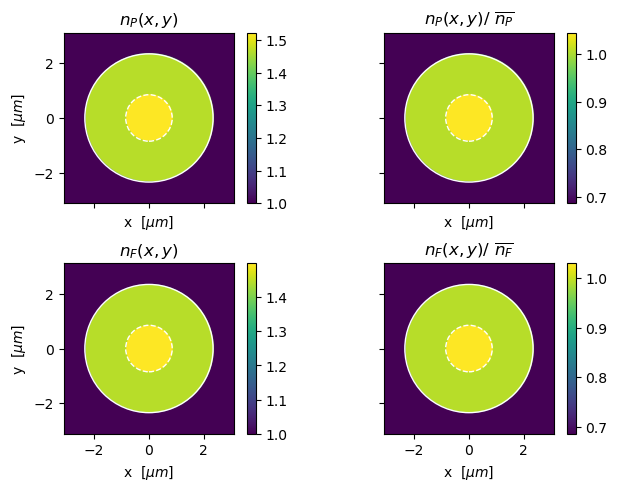

In [11]:
fig3, axs3 = plt.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)

cnp=axs3[0,0].imshow(n_xyp,extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
cnpn=axs3[0,1].imshow(n_xyp/neffp,extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
cnf=axs3[1,0].imshow(n_xyf,extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])
cnfn=axs3[1,1].imshow(n_xyf/nefff,extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])

axs3[0,0].set_ylabel(r'y  [$\mu m$]')
axs3[1,0].set_ylabel(r'y  [$\mu m$]')

axs3[0,0].set_title(r'$n_P(x,y)$')
axs3[0,1].set_title(r'$n_P(x,y)/~\overline{n_P}$')
axs3[1,0].set_title(r'$n_F(x,y)$')
axs3[1,1].set_title(r'$n_F(x,y)/~\overline{n_F}$')

for ax in axs3.flat:
    circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
    circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    # Automatically set ticks using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.set_xlabel(r'x  [$\mu m$]')


fig3.colorbar(cnp,ax=axs3[0,0])
fig3.colorbar(cnpn,ax=axs3[0,1])
fig3.colorbar(cnf,ax=axs3[1,0])
fig3.colorbar(cnfn,ax=axs3[1,1])

fig3.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

In [12]:
# Group velocity mesh

vgp_core= 191772038.13201022 # Group velocity of the core material at the pump frequency
vgf_core=198169156.3387429 # Group velocity of the core material at the triplet frequency
vgp_clad=200543209.07832003  # Group velocity of the clad material at the pump frequency
vgf_clad=205198137.59152824 # Group velocity of the clad material at the pump frequency
#Initialize group velocity mesh
vgp_xy=np.zeros_like(n_xyp) 
vgf_xy=np.zeros_like(n_xyf)

#Assign values using boolean masking
#Pump mode
vgp_xy[n_xyp >1.5]=vgp_core
vgp_xy[(n_xyp >1.2) & (n_xyp <1.5) ]=vgp_clad
vgp_xy[n_xyp <1.2]=c0 # In air, the group velocity is approx the speed of light in vacuum
# Triplet mode
vgf_xy[n_xyf >1.49]=vgf_core
vgf_xy[(n_xyf >1.2) & (n_xyf <1.49)]=vgp_clad
vgf_xy[n_xyf <1.2]=c0 # In air, the group velocity is approx the speed of light in vacuum

# Group velocities of the pump and triplet modes
vgp=disp_data.vg_p(w_p*1e-14)*1e8 #Group velocity pump mode in m/s
vgf=disp_data.vg_f(w_f*1e-14)*1e8 #Group velocity triplet mode in m/s

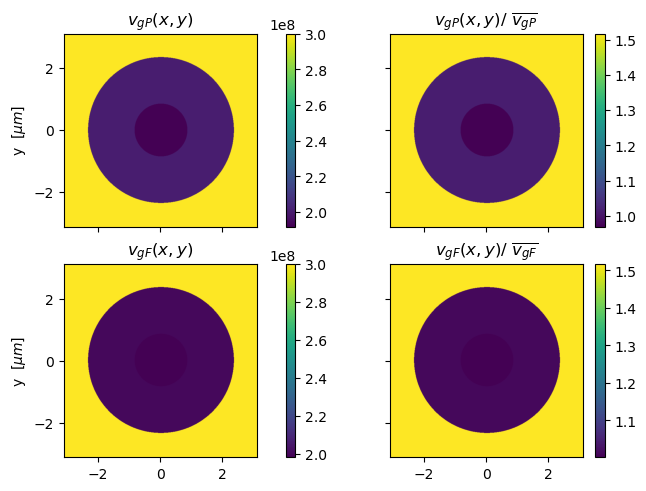

In [13]:
fig4, axs4 = plt.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)

cvgp=axs4[0,0].imshow(vgp_xy,extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
cvgpn=axs4[0,1].imshow(vgp_xy/vgp,extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
cvgf=axs4[1,0].imshow(vgf_xy,extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])
cvgfn=axs4[1,1].imshow(vgf_xy/vgf,extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])

axs4[0,0].set_ylabel(r'y  [$\mu m$]')
axs4[1,0].set_ylabel(r'y  [$\mu m$]')

axs4[0,0].set_title(r'$v_{gP}(x,y)$')
axs4[0,1].set_title(r'$v_{gP}(x,y)/~\overline{v_{gP}}$')
axs4[1,0].set_title(r'$v_{gF}(x,y)$')
axs4[1,1].set_title(r'$v_{gF}(x,y)/~\overline{v_{gF}}$')

for ax in axs1.flat:
    circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
    circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    # Automatically set ticks using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.set_xlabel(r'x  [$\mu m$]')


fig4.colorbar(cvgp,ax=axs4[0,0])
fig4.colorbar(cvgpn,ax=axs4[0,1])
fig4.colorbar(cvgf,ax=axs4[1,0])
fig4.colorbar(cvgfn,ax=axs4[1,1])

fig4.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

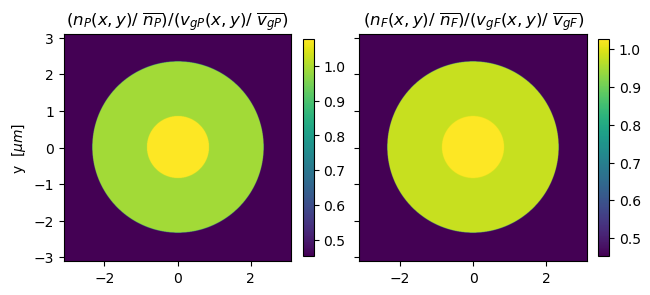

In [14]:
fig5, axs5 = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)

c51=axs5[0].imshow((n_xyp/neffp)/(vgp_xy/vgp),extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
c52=axs5[1].imshow((n_xyf/nefff)/(vgf_xy/vgf),extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])

axs5[0].set_ylabel(r'y  [$\mu m$]')


axs5[0].set_title(r'$(n_{P}(x,y)/~\overline{n_{P}})/(v_{gP}(x,y)/~\overline{v_{gP}})$')
axs5[1].set_title(r'$(n_{F}(x,y)/~\overline{n_{F}})/(v_{gF}(x,y)/~\overline{v_{gF}})$')


for ax in axs1:
    circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
    circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    # Automatically set ticks using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.set_xlabel(r'x  [$\mu m$]')


fig5.colorbar(c51,ax=axs5[0],shrink=0.46)
fig5.colorbar(c52,ax=axs5[1],shrink=0.46)

fig5.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

#### Nonlinear refractive index mesh

References:

- Schiek, R. (2023). Nonlinear refractive index in silica glass. Optical Materials Express, 13(6), 1727-1740.

- Yatsenko, Y., & Mavritsky, A. (2007). D-scan measurement of nonlinear refractive index in fibers heavily doped with Ge O 2. Optics letters, 32(22), 3257-3259.

- Boskovic, A., Chernikov, S. V., Taylor, J. R., Gruner-Nielsen, L., & Levring, O. A. (1996). Direct continuous-wave measurement of n 2 in various types of telecommunication fiber at 1.55 μ m. Optics letters, 21(24), 1966-1968.

In [15]:
# Nonlinear refractive index mesh

# n2_sio2=2.44e-20 #Silica nonlinear refractive index [m^2/W] 
n2_sio2=2.16e-20 #Silica nonlinear refractive index [m^2/W] 
x_geo2=36 # Mole concentration of GeO2 in percent %
# n2_xgeo2=0.0552e-20*x_geo2
n2_xgeo2=0.033e-20*x_geo2 #Increase of nonlinear refractive index dependent on mole concentration [m^2/W] 
n2_geo2=n2_sio2+n2_xgeo2 # 36% GeO2 doped core nonlinear refractive index [m^2/W]
n2_air=8.1e-24  # Air nonlinear refractive index [m^2/W]

#Initialize group velocity mesh
n2_xy=np.zeros_like(n_xyp) 
n2_xy=np.zeros_like(n_xyf)

#Assign values using boolean masking
n2_xy[n_xyp >1.5]=n2_geo2 #core
n2_xy[(n_xyp >1.2) & (n_xyp <1.5) ]=n2_sio2 #clad
n2_xy[n_xyp <1.2]=n2_air 


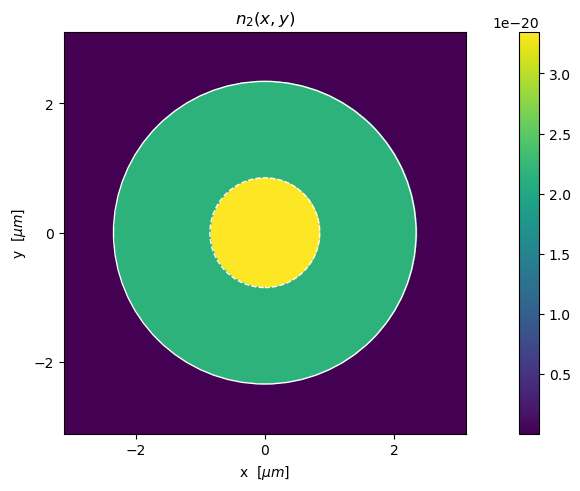

In [16]:
fig1, axs1 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)

cnp=axs1.imshow(n2_xy,extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])

axs1.set_ylabel(r'y  [$\mu m$]')

axs1.set_title(r'$n_{2}(x,y)$')

circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
axs1.add_patch(circ1)
axs1.add_patch(circ2)
# Automatically set ticks using MaxNLocator
axs1.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
axs1.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
axs1.set_xlabel(r'x  [$\mu m$]')


fig1.colorbar(cnp,ax=axs1)

fig1.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

#### Normalized electric field distributions- Process XXXX

In [17]:
xp=x_p.reshape(-1)
yp=y_p.reshape(-1)
N_xp=np.sqrt(np.trapezoid(np.trapezoid(np.abs(E_xp*np.conj(E_xp))*(n_xyp/neffp)/(vgp_xy/vgp),xp,axis=1),yp))
E_xpn=E_xp/N_xp

In [18]:
xf=x_f.reshape(-1)
yf=y_f.reshape(-1)
N_xf=np.sqrt(np.trapezoid(np.trapezoid(np.abs(E_xf*np.conj(E_xf))*(n_xyf/nefff)/(vgf_xy/vgf),xf,axis=1),yf))
E_xfn=E_xf/N_xf

In [19]:
print(np.abs(np.trapezoid(np.trapezoid(E_xfn*np.conj(E_xfn),xf,axis=1),yf)))

0.9920926767629854


In [20]:
print(N_xp,N_xf)

1.8844751718146311e-06 1.5316756765261582e-06


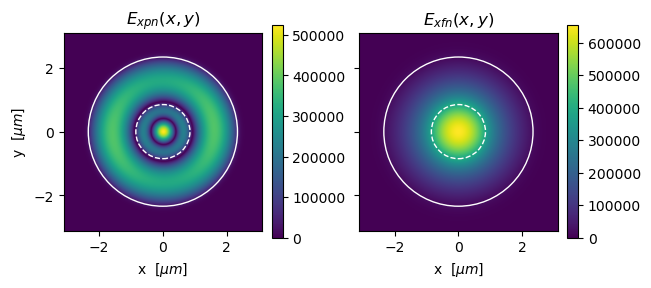

In [21]:
fig1, axs1 = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)

c1=axs1[0].imshow(np.abs(E_xpn),extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
c2=axs1[1].imshow(np.abs(E_xfn),extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])

axs1[0].set_ylabel(r'y  [$\mu m$]')

axs1[0].set_title(r'$E_{xpn}(x,y)$')
axs1[1].set_title(r'$E_{xfn}(x,y)$')

for ax in axs1.flat:
    circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
    circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    # Automatically set ticks using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.set_xlabel(r'x  [$\mu m$]')

fig1.colorbar(c1,ax=axs1[0],shrink=0.45)
fig1.colorbar(c2,ax=axs1[1],shrink=0.45)

fig1.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

##### Overlap integrand

In [22]:
Ipfff=n2_xy*E_xp*np.conj(E_xf)*np.conj(E_xf)*np.conj(E_xf)

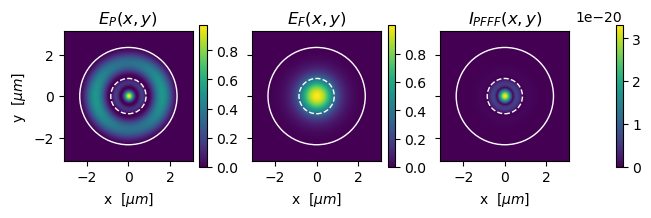

In [23]:
fig1, axs1 = plt.subplots(1, 3, sharex=True, sharey=True, constrained_layout=True)
c1=axs1[0].imshow(np.abs(E_xp)**2,extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])
c2=axs1[1].imshow(np.abs(E_xf)**2,extent=[x_f[0]*1e6,x_f[-1]*1e6,y_f[0]*1e6,y_f[-1]*1e6])
c3=axs1[2].imshow(np.abs(Ipfff),extent=[x_p[0]*1e6,x_p[-1]*1e6,y_p[0]*1e6,y_p[-1]*1e6])

axs1[0].set_ylabel(r'y  [$\mu m$]')

fig1.colorbar(c1,ax=axs1[0],shrink=0.3)
fig1.colorbar(c2,ax=axs1[1],shrink=0.3)
fig1.colorbar(c3,ax=axs1[2],shrink=0.3)

axs1[0].set_title(r'$E_P(x,y)$')
axs1[1].set_title(r'$E_F(x,y)$')
axs1[2].set_title(r'$I_{PFFF}(x,y)$')

for ax in axs1.flat:
    circ1=Circle((0, 0), 0.849, facecolor='None', edgecolor='w', lw=1,ls='--')
    circ2 = Circle((0, 0), 2.34086, facecolor='None', edgecolor='w', lw=1)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    # Automatically set ticks using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=6))
    ax.set_xlabel(r'x  [$\mu m$]')


# fig1.colorbar(c1)
fig1.set_edgecolor('none')
plt.gca().set_aspect('equal')


plt.show()

#### Effective area $A_{PFFF}$ in $m^2$

In [24]:
a_pfff=(N_xp*N_xf*N_xf*N_xf)/np.trapezoid(np.trapezoid(Ipfff/n2_geo2,xf,axis=1),yf) # Efective area for TOPDC in m^2
print(np.abs(a_pfff))

1.691930053604717e-10


#### Nonlinear parameter $\gamma_{PFFF}$ in $(Wm)^{-1}$

In [25]:
om=(w_p*w_f*w_f*w_f)**(1/4)
neff=(nefff**2)/((neffp*nefff*nefff*nefff)**(1/2))
int_pfff=np.trapezoid(np.trapezoid(Ipfff,xf,axis=1),yf)/(N_xp*N_xf*N_xf*N_xf)

In [26]:
gamma_pfff=om*neff*(1/c0)*int_pfff
print(np.abs(gamma_pfff))

[0.00118813]
